# Вероятность и Мат. Статистика ч.2
Шестаков А.В. Майнор по анализу данных

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 

plt.style.use('ggplot')

font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

%matplotlib inline

## Распределения случайных величин

На лекциях были рассмотрены распределения дискретных и непрерывных случайных величин.<br/> Были изучены соотношения, которые устанавливают связь значений случайных величин и соответствующие им вероятноти -  **функции распределения** (cumulative density function/probability mass function) и **плотности распределения** (probability density function).

Посмотрим, как можно обращатся к законам распределения в Python

### Распределение Бернулли

Случайная величина принимает 2 возможных значения (успех или провал, мужской или женский пол и тп)

$$ F(X=x)=p^x(1-p)^{1-x}, \quad x = \{0, 1\}$$

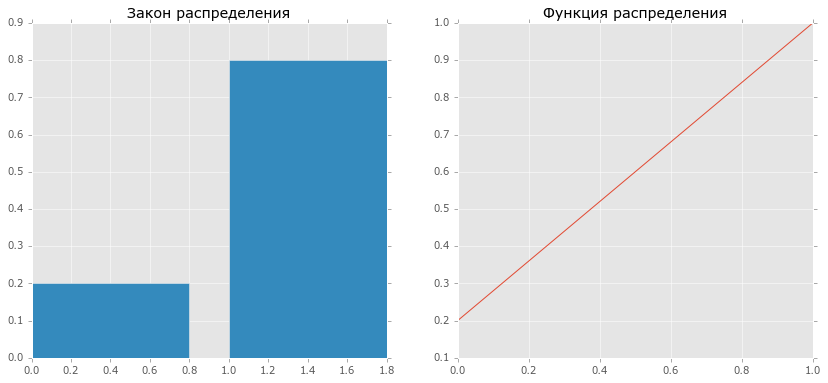

In [4]:
n = 1
p = 0.8

fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)
x = np.arange(0,n+1)

prob_mass = stats.bernoulli.pmf(x, p)
prob = stats.bernoulli.cdf(x, p)
ax[0].bar(x,prob_mass)
ax[1].plot(x, prob)

ax[0].set_title(u'Закон распределения')
ax[1].set_title(u'Функция распределения')

### Биномиальный закон распределения

Вероятность наступления числа $X=m$ события в $n$ независимых испытаниях, в каждом из которых оно может наступить с вероятностью $p$:
$$ F(X=m|p,n)=C_n^m p^m (1-p)^{n-m} $$

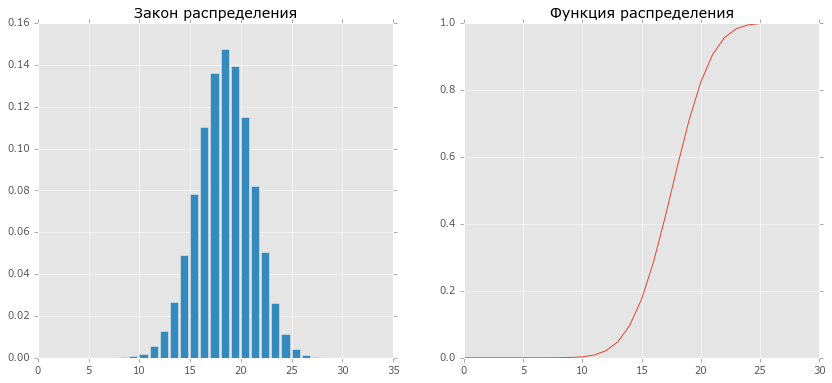

In [5]:
n = 30
p = 0.6

fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)
x = np.arange(0, n+1)
prob_mass = stats.binom.pmf(x, n, p)
prob = stats.binom.cdf(x, n, p)
ax[0].bar(x,prob_mass)
ax[1].plot(x, prob)

ax[0].set_title(u'Закон распределения')
ax[1].set_title(u'Функция распределения')

### Распределение Пуассона

$$ F(X=m|\lambda)=\lambda^m \frac{\exp(-\lambda)}{m!} $$

Является предельным приближением к биномиальному распределению!

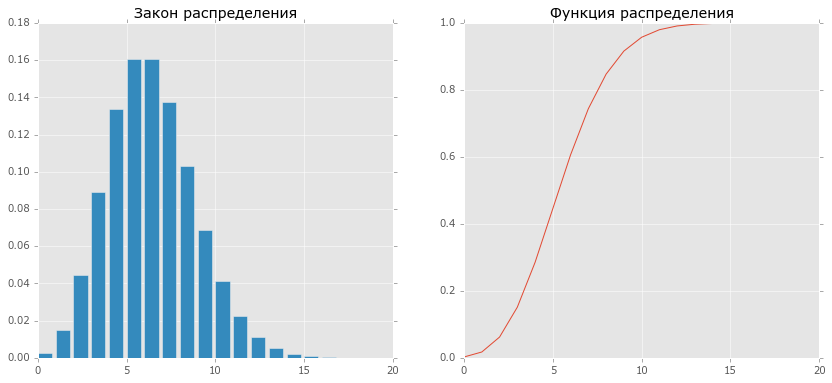

In [4]:
n = 10
p = 0.6

lamb = n*p

fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)
x = np.arange(0, 2*n)
prob_dens = stats.poisson.pmf(x, lamb)
prob = stats.poisson.cdf(x, lamb)
ax[0].bar(x, prob_dens)
ax[1].plot(x, prob)

ax[0].set_title(u'Закон распределения')
ax[1].set_title(u'Функция распределения')

### Нормальное распределение

Самое известное распределение - нормальное распрежедение. Параметры: $\mu$ - среднее значение, $\sigma$ - дисперсия

$$ f_X(x | \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{-\frac{(x-\mu)^2}{2\sigma^2}}$$

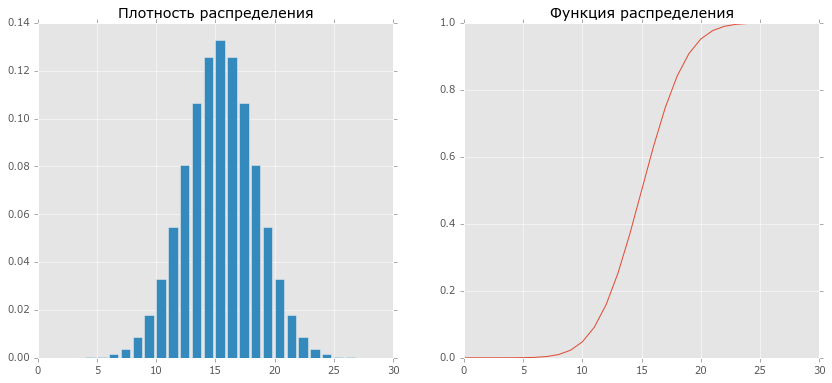

In [5]:
mu = 15
sig = 3

fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)
x = np.arange(0, 2*mu)
prob_dens = stats.norm.pdf(x, mu, sig)
prob = stats.norm.cdf(x, mu, sig)
ax[0].bar(x,prob_dens)
ax[1].plot(x, prob)

ax[0].set_title(u'Плотность распределения')
ax[1].set_title(u'Функция распределения')

### Степенной закон

Известно так же как закон Парето. 

$$ f_X(x|\alpha) = \alpha x^{-\alpha - 1}, x\geq1, \quad \alpha>0 $$

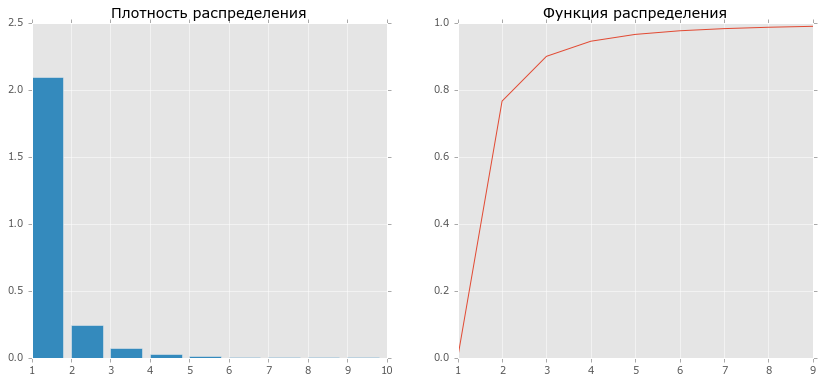

In [6]:
alpha = 2.1


fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)
x = np.arange(1, 10, 1)
prob_dens = stats.pareto.pdf(x, alpha)
prob = stats.pareto.cdf(x, alpha)
ax[0].bar(x, prob_dens)
ax[1].plot(x, prob)

ax[0].set_title(u'Плотность распределения')
ax[1].set_title(u'Функция распределения')

## Генерация случайных величин

Общий способ генерации случайных величин в соответствии с каким-либо законом: `stats.some_law.rvs(**params)`

array([  9.30595087,  11.66988553,  11.34142934,  10.85574115,
        11.01340086,  14.70807971,   7.68492602,   6.78137829,
        14.53818939,   8.75129825])

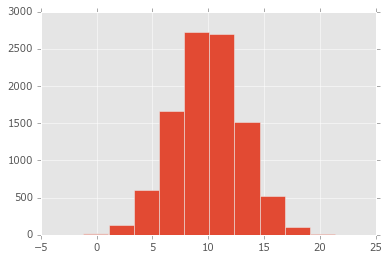

In [6]:
x = stats.norm.rvs(10, 3, size=10000)
plt.hist(x)
x[:10]

### Дополнительные характеристики распределений

In [11]:
stats.tmean(x)
stats.kurtosis(x)

10.002252956569636

Kutorsis (коэффициент эксцесса) - мера остроты распределения. Для нормального распределения $= 0$. Для относительно равномерных распределений $< 0$. Для распределений с резким пиком $> 0$

In [12]:
stats.skew(x)

0.015720856348152866

Skew (коэффициент смещения) - смещение распределения, относительно среднего значения.<br/> Если смещено влево, то $< 0$, если смещено всправо - $> 0$ 

## Оценка параметров

Общий способ оценки параметров распределений под данные: `stats.some_law.fit(x)`

In [16]:
params = stats.norm.fit(x)
params

(10.002252956569636, 3.0249491772318766)

В метод fit зашита оценка методом **максимального правдоподобия**
$$ \max_\theta f_X(X=x_1, X=x_2, \dots, X=x_n | \theta) = \max_\theta \prod_{i=1}^n f_X(x_i|\theta)$$

Давайте попробуем решить какой-нибудь простой пример у доски..

## Наивный байесовский классификатор и категоризация текстов

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$

Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$

In [11]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer